-50.csv: 0.890173410405
-200.csv: 0.964769647696
-400.csv: 0.96449704142
-50.csv_DT_MaxDepth
0.809248554913
-50.csv_DT_MinLeafSize
0.809248554913


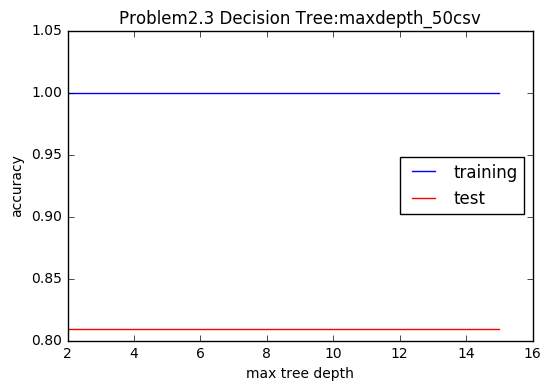

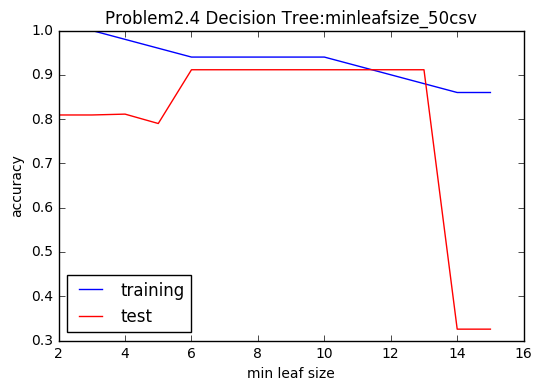

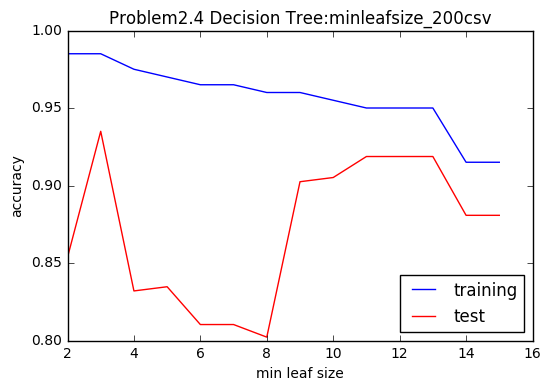

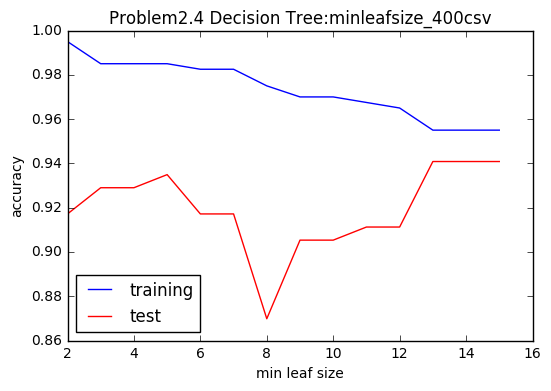

In [35]:
import csv
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

Xtrn_50 = pd.read_csv("X-trn-50.csv",header=None)
Ytrn_50 = pd.read_csv("Y-trn-50.csv",header=None)
Xtst_50 = pd.read_csv("X-tst-50.csv",header=None)
Ytst_50 = pd.read_csv("Y-tst-50.csv",header=None)
Xtrn_200 = pd.read_csv("X-trn-200.csv",header=None)
Ytrn_200 = pd.read_csv("Y-trn-200.csv",header=None)
Xtst_200 = pd.read_csv("X-tst-200.csv",header=None)
Ytst_200 = pd.read_csv("Y-tst-200.csv",header=None)
Xtrn_400 = pd.read_csv("X-trn-400.csv",header=None)
Ytrn_400 = pd.read_csv("Y-trn-400.csv",header=None)
Xtst_400 = pd.read_csv("X-tst-400.csv",header=None)
Ytst_400 = pd.read_csv("Y-tst-400.csv",header=None)

#GaussianNB for 3 datasets
gnb = GaussianNB()
Ypred_50 = gnb.fit(Xtrn_50, Ytrn_50.values.ravel()).predict(Xtst_50)
Ypred_200 = gnb.fit(Xtrn_200, Ytrn_200.values.ravel()).predict(Xtst_200)
Ypred_400 = gnb.fit(Xtrn_400, Ytrn_400.values.ravel()).predict(Xtst_400)
Acc_50=gnb.fit(Xtrn_50, Ytrn_50.values.ravel()).score(Xtst_50,Ytst_50)
Acc_200=gnb.fit(Xtrn_200, Ytrn_200.values.ravel()).score(Xtst_200,Ytst_200)
Acc_400=gnb.fit(Xtrn_400, Ytrn_400.values.ravel()).score(Xtst_400,Ytst_400)
print('-50.csv:',Acc_50)
print('-200.csv:',Acc_200)
print('-400.csv:',Acc_400)

#DecisionTree for 3 datasets
TrnAc_depth_50=list(range(2,16))
TstAc_depth_50=list(range(2,16))

TrnAc_leaf_50=list(range(2,16))
TstAc_leaf_50=list(range(2,16))
TrnAc_leaf_200=list(range(2,16))
TstAc_leaf_200=list(range(2,16))
TrnAc_leaf_400=list(range(2,16))
TstAc_leaf_400=list(range(2,16))

for i in range(2,16):
    #max depth 
    clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=0)
    clf1 = clf1.fit(Xtrn_50,Ytrn_50)
    TrnAc_depth_50[i-2]=clf1.score(Xtrn_50,Ytrn_50)
    TstAc_depth_50[i-2]=clf1.score(Xtst_50,Ytst_50)
    #min leaf size
    clf2 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i,random_state=0)
    clf2_50 = clf2.fit(Xtrn_50,Ytrn_50)
    TrnAc_leaf_50[i-2]=clf2_50.score(Xtrn_50,Ytrn_50)
    TstAc_leaf_50[i-2]=clf2_50.score(Xtst_50,Ytst_50)
    
    clf2_200 = clf2.fit(Xtrn_200,Ytrn_200)
    TrnAc_leaf_200[i-2]=clf2_200.score(Xtrn_200,Ytrn_200)
    TstAc_leaf_200[i-2]=clf2_200.score(Xtst_200,Ytst_200)
    
    clf2_400 = clf2.fit(Xtrn_400,Ytrn_400)
    TrnAc_leaf_400[i-2]=clf2_400.score(Xtrn_400,Ytrn_400)
    TstAc_leaf_400[i-2]=clf2_400.score(Xtst_400,Ytst_400)
    
print('-50.csv_DT_MaxDepth')
print(TstAc_depth_50[0])
print('-50.csv_DT_MinLeafSize')
print(TstAc_leaf_50[0])

x=range(2,16)

plt.plot(x,TrnAc_depth_50,c='blue',label='training')
plt.plot(x,TstAc_depth_50,c='red',label='test')
plt.legend(loc = 5)      
plt.ylabel('accuracy')
plt.xlabel('max tree depth')
plt.title('Problem2.3 Decision Tree:maxdepth_50csv')
plt.show()

plt.plot(x,TrnAc_leaf_50,c='blue',label='training')
plt.plot(x,TstAc_leaf_50,c='red',label='test')
plt.legend(loc = 3)  
plt.ylabel('accuracy')
plt.xlabel('min leaf size')
plt.title('Problem2.4 Decision Tree:minleafsize_50csv')
plt.show()

plt.plot(x,TrnAc_leaf_200,c='blue',label='training')
plt.plot(x,TstAc_leaf_200,c='red',label='test')
plt.legend(loc = 4)  
plt.ylabel('accuracy')
plt.xlabel('min leaf size')
plt.title('Problem2.4 Decision Tree:minleafsize_200csv')
plt.show()

plt.plot(x,TrnAc_leaf_400,c='blue',label='training')
plt.plot(x,TstAc_leaf_400,c='red',label='test')
plt.legend(loc = 3)  
plt.ylabel('accuracy')
plt.xlabel('min leaf size')
plt.title('Problem2.4 Decision Tree:minleafsize_400csv')
plt.show()
